In [374]:
#Import Necessary Library
import cv2
from PIL import Image
from IPython.display import display

In [375]:
def fill_bin(list, num):
    temp = []
    while(num > 0):
        #temp.append(str(num % 2))
        temp.append(num % 2)
        num = num // 2
    temp = temp[::-1]
    
    #make it 8 bit long
    if(len(temp) < 8):
        i = 0
        n = 8 - (len(temp))
        while(i < n):
            temp.insert(0,0)
            i+=1
    
    return list + temp

In [376]:
def secret_text_2_binary(secret_msg):
    #secret_msg = 'IIT Bhubaneswar'
    secret_msg_list = [secret_msg]
    #print(secret_msg_list)
    secret_msg_list_ascii = []
    for ele in secret_msg_list:
        secret_msg_list_ascii.extend(ord(num) for num in ele)
    #print(secret_msg_list_ascii)
    #print(len(secret_msg_list_ascii))

    secret_msg_list_ascii_bin = []
    for i in range(len(secret_msg_list_ascii)):
        a = secret_msg_list_ascii[i]
        secret_msg_list_ascii_bin = fill_bin(secret_msg_list_ascii_bin, a)
    #print(secret_msg_list_ascii_bin)
    #print(len(secret_msg_list_ascii_bin))

    #print(len(secret_msg_list_ascii_bin))
    
    return secret_msg_list_ascii_bin

In [377]:
def encode(image):
    secret_msg = 'IIT Bhubaneswar'
    print('Secret Message is :::: ' + secret_msg)
    converted_secret_message = []
    converted_secret_message = secret_text_2_binary(secret_msg)
    #print(converted_secret_message)
    length = len(converted_secret_message)
    
    #create a new image
    image1 = image
    pixels = image1.load() #create the pixel map
    
    for i in range(image1.size[0]):
        for j in range(image1.size[1]):
            pass #This is just for cheking purpose
            #print(pixels[i,j])
            
    #print('##################################')
    
    index = 0
    for i in range(image1.size[0]):
        for j in range(image1.size[1]):
            if(converted_secret_message[index] == 0 and (pixels[i,j] % 2 == 1)):
                pixels[i,j]-= 1
            elif(converted_secret_message[index] == 1 and (pixels[i,j] % 2 == 0)):
                pixels[i,j]+= 1
            #print(pixels[i,j])
            index+=1
            if(index == length):
                return image1, length
                    
                """"elif(converted_secret_message[index] == 0 and (pixels[i,j] % 2 == 1)):
                    a = pixels[i,j]
                    pixels[i,j] = (a + 1)
                    index+=1
                elif(converted_secret_message[index] == 1 and (pixels[i,j] % 2 == 0)):
                    a = pixels[i,j]
                    pixels[i,j] = (a + 1)
                    index+=1
                elif(converted_secret_message[index] == 1 and (pixels[i,j] % 2 == 1)):
                    a = pixels[i,j]
                    pixels[i,j] = (a + 0)
                    index+=1
                print(pixels[i,j])
            """
    
    return image1

In [378]:
#code to fill encoded message to binary bit
def fill_decoded(list, num):
    temp = []
    temp.append(num % 2)
    return list + temp

In [379]:
#function to convert binary to deciaml and then decimal to string
def fin_msg(list):
    list1 = []
    
    lenght = len(list)
    
    index = 0
    while(index < lenght):
        i = 0
        temp = []
        while(i < 8):
            temp.append(list[index])
            index+=1
            i+=1
        res = int("".join(str(x) for x in temp), 2)
        list1.append(res)
        #print(res)
    
    #int to char
    length2 = len(list1)
    for i in range(length2):
        t = list1[i]
        list1[i] = chr(list1[i])
    return "".join(list1)
    #return list1
    #print(list1)

In [380]:
#code to extract encode bit from encoded image
def decode(image, size):
    decoded_msg_list_bin = []
    d_pixels = image.load()
    
    index = 0
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            decoded_msg_list_bin = fill_decoded(decoded_msg_list_bin, d_pixels[i,j])
            index+=1
            if(index == size):
                fin_msg1 = fin_msg(decoded_msg_list_bin)
                #print(fin_msg1)
                return fin_msg1

Original Image is :::: 


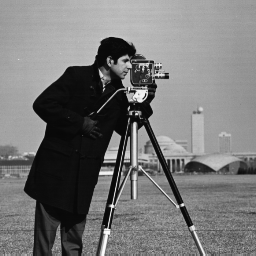

Secret Message is :::: IIT Bhubaneswar
------------------------------------------------------------------------------------------------------------------
Encoded Image is ::::: 


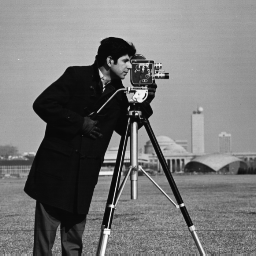

Decoded Message is ::: IIT Bhubaneswar


In [381]:
#read image
orgImg = Image.open('RANJEET KUMAR - Cover_1.png')

print('Original Image is :::: ')
display(orgImg)

encImg, size = encode(orgImg) # call to encode secret message into image
decoded_message = decode(encImg, size) # call to decode message

print('------------------------------------------------------------------------------------------------------------------')

print('Encoded Image is ::::: ')
display(encImg)


print('Decoded Message is ::: '+ decoded_message)